# Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

**The advantages of support vector machines are:**

Effective in high dimensional spaces.

1.   Still effective in cases where number of dimensions is greater than the number of samples.

2.   Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

3.   Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.


**The disadvantages of support vector machines include:**

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

**SVM doesn’t support multiclass classification. For multiclass classification, we need to breakedown the multi-classification problem into smaller subproblems, all of which are binary classification problems.**


The popular methods which are used to perform multi-classification on the problem statements using SVM are as follows:

👉 One vs One (OVO) approach

👉 One vs All (OVA) approach

👉 Directed Acyclic Graph (DAG) approach

Link: (https://https://www.analyticsvidhya.com/blog/2021/05/multiclass-classification-using-svm/)

**What is C and Gamma?**

(https://https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be)

**NON-SEPARABLE CLASSIFICATION – MULTI-FONT CHARACTER RECOGNITION:**

This problem is a multi-input and multi-output classification issue that we would like to solve by SVM algorithm. This is a classification problem which involves 26 classes as outputs and 6 features or inputs. So, this is a 6-dimensional problem. The task here is to design and train an SVM to minimize the error between actual and predicted output values. We have 78 data points as training dataset and 78 datapoints as testing dataset. The steps I did from beginning to end will be explained in the following.
Note: Here, data is not linearly separable, so, we need to combine SVM with kernels that help SVM become extremely powerful.
Although we have 26 outputs or classes, after encoding these outputs, we have a multi-class classification problem that need to solve as 26 binary classification problems.  

In [ ]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
#Load data from local drive 
from google.colab import files
uploaded = files.upload()

Saving font_test.csv to font_test.csv
Saving font_train.csv to font_train.csv


In [ ]:
#Load data set
font_train = pd.read_csv('font_train.csv')
font_test = pd.read_csv('font_test.csv')

In [ ]:
font_train.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,Q,R,S,T,U,V,W,X,Y,Z
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,10,1,1,0,0,0,4,6,0,...,0,0,0,0,0,0,0,0,0,0
3,21,10,4,4,0,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,27,12,3,3,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


 ***Exploratory data analysis ***
 
 Now, I will explore the data to gain insights about the data.

In [ ]:
# view dimensions of dataset
font_train.shape

(78, 40)

In [ ]:
font_test.shape

(78, 40)

In [ ]:
font_train.describe()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,Q,R,S,T,U,V,W,X,Y,Z
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,8.089744,11.358974,2.307692,2.525641,0.192308,1.884615,0.358974,1.307692,1.166667,0.397436,...,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462
std,7.552734,6.907505,2.549804,2.930912,0.967762,3.057801,1.459179,2.034174,2.635505,0.671106,...,0.193552,0.193552,0.193552,0.193552,0.193552,0.193552,0.193552,0.193552,0.193552,0.193552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,11.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.750000,14.750000,4.000000,4.000000,0.000000,4.000000,0.000000,3.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,31.000000,10.000000,12.000000,5.000000,11.000000,8.000000,5.000000,9.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Our target variables are 'A','B',...,'Z' columns. So, I will check its distribution. We will check **target distribution** to know whether we have class imbalanced or not.

In [ ]:
# check distribution of target_class column
#We have three different alphabets for training data, so, we have three 'A', three 'B',...,three 'Z'

font_train['A'].value_counts()
font_train['Z'].value_counts()

0    75
1     3
Name: Z, dtype: int64

In [ ]:
# view the percentage distribution of target_class column

font_train['A'].value_counts()/float(len(font_train))

0    0.961538
1    0.038462
Name: A, dtype: float64

We can see that percentage of observations of the class label 0 and 1 for each label is 96.15% and 3.84%. So, this is **a class imbalanced problem**.

In [ ]:
# view summary of dataset

font_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input_a  78 non-null     int64
 1   input_b  78 non-null     int64
 2   input_c  78 non-null     int64
 3   input_d  78 non-null     int64
 4   input_e  78 non-null     int64
 5   input_f  78 non-null     int64
 6   input_g  78 non-null     int64
 7   input_h  78 non-null     int64
 8   input_i  78 non-null     int64
 9   input_j  78 non-null     int64
 10  input_k  78 non-null     int64
 11  input_l  78 non-null     int64
 12  input_m  78 non-null     int64
 13  input_n  78 non-null     int64
 14  A        78 non-null     int64
 15  B        78 non-null     int64
 16  C        78 non-null     int64
 17  D        78 non-null     int64
 18  E        78 non-null     int64
 19  F        78 non-null     int64
 20  G        78 non-null     int64
 21  H        78 non-null     int64
 22  I        78 non-null     int

In [ ]:
# view summary of dataset

font_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input_a  78 non-null     int64
 1   input_b  78 non-null     int64
 2   input_c  78 non-null     int64
 3   input_d  78 non-null     int64
 4   input_e  78 non-null     int64
 5   input_f  78 non-null     int64
 6   input_g  78 non-null     int64
 7   input_h  78 non-null     int64
 8   input_i  78 non-null     int64
 9   input_j  78 non-null     int64
 10  input_k  78 non-null     int64
 11  input_l  78 non-null     int64
 12  input_m  78 non-null     int64
 13  input_n  78 non-null     int64
 14  A        78 non-null     int64
 15  B        78 non-null     int64
 16  C        78 non-null     int64
 17  D        78 non-null     int64
 18  E        78 non-null     int64
 19  F        78 non-null     int64
 20  G        78 non-null     int64
 21  H        78 non-null     int64
 22  I        78 non-null     int

We can see that there are no missing values in the dataset and all the variables are numerical variables.

**Explore missing values in variables**

In [ ]:
# check for missing values in variables

font_train.isnull().sum()

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
A          0
B          0
C          0
D          0
E          0
F          0
G          0
H          0
I          0
J          0
K          0
L          0
M          0
N          0
O          0
P          0
Q          0
R          0
S          0
T          0
U          0
V          0
W          0
X          0
Y          0
Z          0
dtype: int64

In [ ]:
# check for missing values in variables

font_test.isnull().sum()

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
A          0
B          0
C          0
D          0
E          0
F          0
G          0
H          0
I          0
J          0
K          0
L          0
M          0
N          0
O          0
P          0
Q          0
R          0
S          0
T          0
U          0
V          0
W          0
X          0
Y          0
Z          0
dtype: int64

We can see that there are no missing values in the dataset.

**Summary of numerical variables**

There are 40 numerical variables in each train and test datasets.

14 are continuous variables and 26 are discrete variable.

The discrete variables are target variables. 

There are no missing values in the dataset.

**Outliers:**

On closer inspection, we can suspect that all the continuous variables may contain outliers. I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'input14')

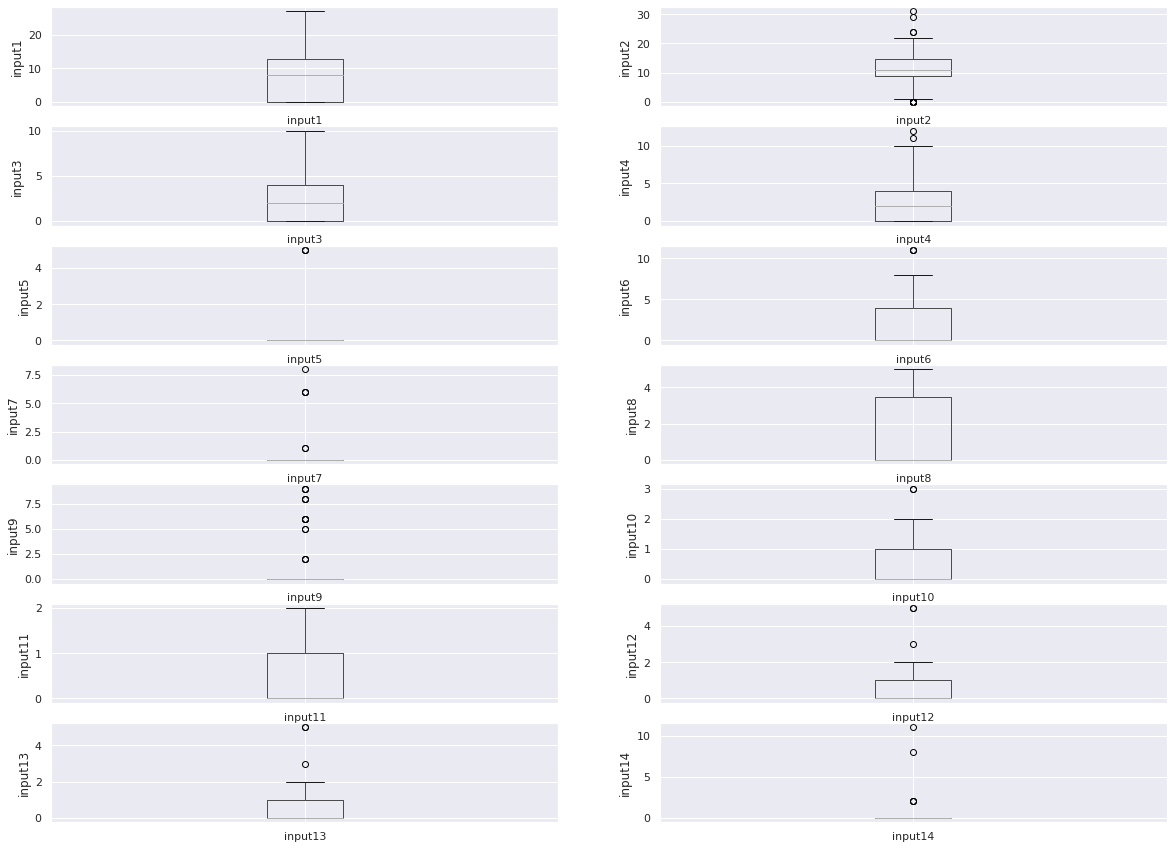

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20,15))


plt.subplot(7, 2, 1)
fig = font_train.boxplot(column='input1')
fig.set_title('')
fig.set_ylabel('input1')


plt.subplot(7, 2, 2)
fig = font_train.boxplot(column='input2')
fig.set_title('')
fig.set_ylabel('input2')


plt.subplot(7, 2, 3)
fig = font_train.boxplot(column='input3')
fig.set_title('')
fig.set_ylabel('input3')


plt.subplot(7, 2, 4)
fig = font_train.boxplot(column='input4')
fig.set_title('')
fig.set_ylabel('input4')


plt.subplot(7, 2, 5)
fig = font_train.boxplot(column='input5')
fig.set_title('')
fig.set_ylabel('input5')


plt.subplot(7, 2, 6)
fig = font_train.boxplot(column='input6')
fig.set_title('')
fig.set_ylabel('input6')


plt.subplot(7, 2, 7)
fig = font_train.boxplot(column='input7')
fig.set_title('')
fig.set_ylabel('input7')


plt.subplot(7, 2, 8)
fig = font_train.boxplot(column='input8')
fig.set_title('')
fig.set_ylabel('input8')


plt.subplot(7, 2, 9)
fig = font_train.boxplot(column='input9')
fig.set_title('')
fig.set_ylabel('input9')


plt.subplot(7, 2, 10)
fig = font_train.boxplot(column='input10')
fig.set_title('')
fig.set_ylabel('input10')


plt.subplot(7, 2, 11)
fig = font_train.boxplot(column='input11')
fig.set_title('')
fig.set_ylabel('input11')


plt.subplot(7, 2, 12)
fig = font_train.boxplot(column='input12')
fig.set_title('')
fig.set_ylabel('input12')


plt.subplot(7, 2, 13)
fig = font_train.boxplot(column='input13')
fig.set_title('')
fig.set_ylabel('input13')


plt.subplot(7, 2, 14)
fig = font_train.boxplot(column='input14')
fig.set_title('')
fig.set_ylabel('input14')


The above boxplots confirm that there are lot of outliers in these variables.

In this link, boxplots are clearly explained:

(https://simplypsychology.org/boxplots.html)


**Handle outliers with SVMs**

There are 2 variants of SVMs. They are **hard-margin** variant of SVM and **soft-margin** variant of SVM.


The **hard-margin** variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.

Another version of SVM is called **soft-margin** variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.

The message is that since the dataset contains outliers, so the value of C should be high while training the model.

**Check the distribution of variables**

Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

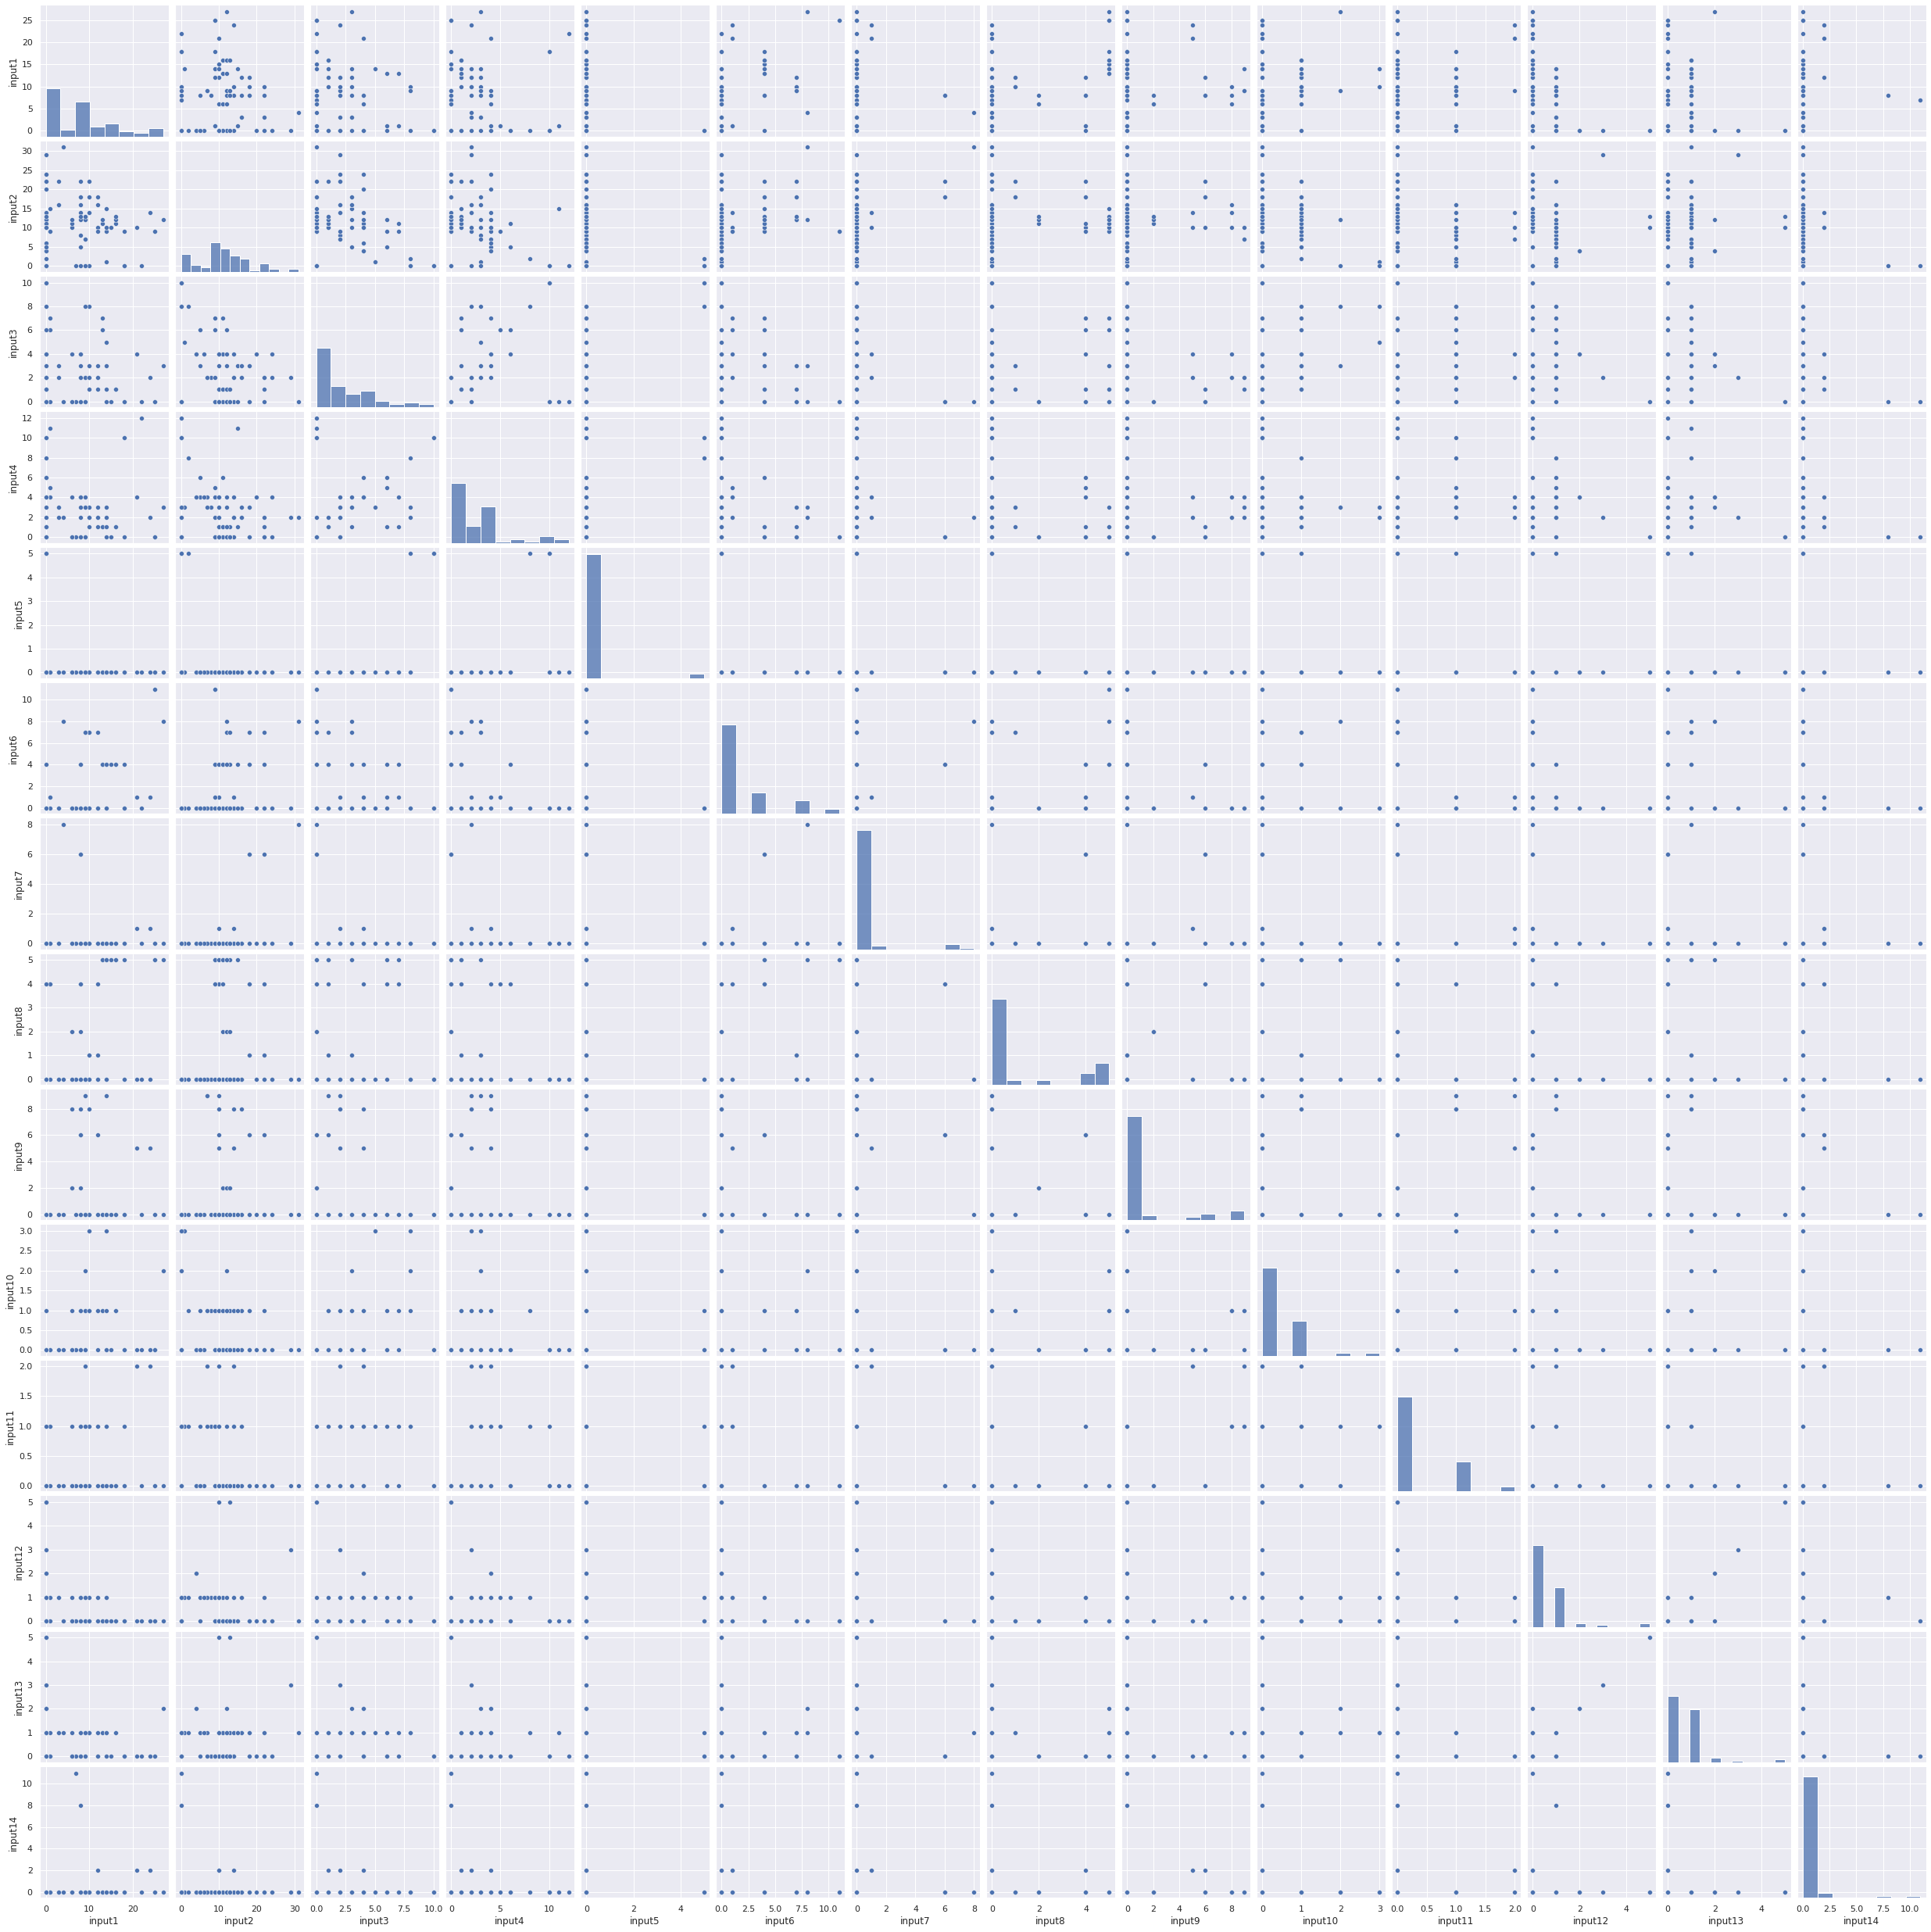

In [ ]:
sns.pairplot(font_train[["input1",'input2','input3','input4','input5','input6','input7','input8','input9','input10','input11','input12','input13','input14']])

We can see that all the 14 continuous variables are skewed.

**Declare feature vector and target variable**

In [ ]:
# Separate feature and target variables for train dataset
font_train = pd.read_csv('font_train.csv')
font_test = pd.read_csv('font_test.csv')
X_train = font_train.copy()
y_train = X_train.iloc[:, 14:40]
print(y_train.shape)

(78, 26)


In [ ]:
# Separate feature and target variables for train dataset
X_train.drop(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'], axis = 1, inplace = True)
print(X_train.shape)

(78, 14)


In [ ]:
# Separate feature and target variables for test dataset
font_train = pd.read_csv('font_train.csv')
font_test = pd.read_csv('font_test.csv')
X_test = font_test.copy() # X_test is a dataframe
y_test = X_test.iloc[:, 14:40]
print(y_test.shape)

(78, 26)


In [ ]:
# Separate feature and target variables for test dataset
X_test.drop(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'], axis = 1, inplace = True)
print(X_test.shape)

(78, 14)


**Check the distribution of variables**

Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

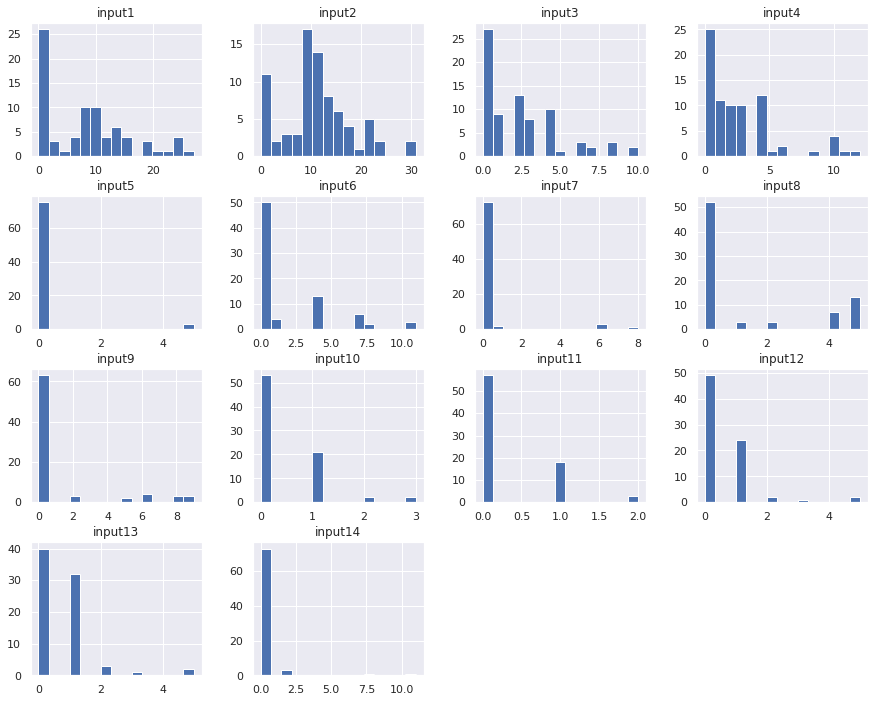

In [ ]:
# plot histogram to check distribution

X_train.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

We can see that all the 14 continuous variables are skewed.

**Feature Scaling**

A standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

Here is an example to scale a iris data matrix to the [0, 1] range:

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train) #fit means training the model which is done on training data, by using this line X_train will be an array not a dataframe
X_train.dtype

dtype('float64')

The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data:

In [ ]:
X_test = scaler.transform(X_test) #The output is an array
X_test
X_test.dtype

dtype('float64')

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols]) #Convert numpy array to dataframe, we do this since we want to add this dataframe to the other dataframe and make a new dataframe

In [ ]:
X_train.describe()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.299620,0.366419,0.230769,0.210470,0.038462,0.171329,0.044872,0.261538,0.129630,0.132479,0.153846,0.105128,0.130769,0.029138
std,0.279731,0.222823,0.254980,0.244243,0.193552,0.277982,0.182397,0.406835,0.292834,0.223702,0.270973,0.189940,0.190220,0.142422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.290323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.296296,0.354839,0.200000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.472222,0.475806,0.400000,0.333333,0.000000,0.363636,0.000000,0.700000,0.000000,0.333333,0.500000,0.200000,0.200000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols]) #Convert numpy array to dataframe

In [ ]:
type(y_train)
y_train.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Run SVM with default hyperparameters**

We have support vector classifiers. I will use two of them:'linear' and 'RBF' classifiers

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,25):
# instantiate classifier with default hyperparameters
  svc=SVC() 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Multi-class classification problem was solved as multiple binary classification problems by using for loop(instead we could use one vs rest or one vs one methods). Model accuracy score with default hyperparameters for different target columns are: 0.9615, 0.9872, 1

**Run SVM with rbf kernel and C=100.0**

We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,25):
# instantiate classifier with default hyperparameters
  svc=SVC(C=100.0) 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)
  y_pred_test=svc.predict(X_test)

# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9744
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9744
Model accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with rbf kernel and C=100.0 : 0.9744, 0.9832,1

We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers and accuracy made better for almost all of the classes except one of them.

Now, I will further increase the value of C=1000.0 and check accuracy.

**Run SVM with rbf kernel and C=1000.0**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,25):
# instantiate classifier with default hyperparameters
  svc=SVC(C=1000.0) 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9744
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9744
Model accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In this case, we can see that the accuracy had not changed with C=1000.0

What does it mean when by changing C, accuracy doesn't change?

**Run SVM with linear kernel**

**Run SVM with linear kernel and C=1.0**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,25):
# instantiate classifier with default hyperparameters
  svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9487
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9615
Model accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

**Run SVM with linear kernel and C=100.0**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,25):
# instantiate classifier with default hyperparameters
  linear_svc=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
  linear_svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=linear_svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

Model accuracy score with default hyperparameters: 0.9744
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9744
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9487
Model accuracy score with default hyperparameters: 0.9744
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9359
Model accuracy score with default hyperparameters: 0.9744
Model accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

**Run SVM with linear kernel and C=1000.0**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,25):
# instantiate classifier with default hyperparameters
  linear_svc100=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
  linear_svc100.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0. But 'rbf' kernel has better performance than linear for this non-linear separable dataset.

**Compare the train-set and test-set accuracy**

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
for i in range(0,25):
  print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train.iloc[:,i], y_pred_train)))

Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9487
Training-set accuracy score: 0.9744


We can see that the training set are lower than test-set accuracy. So, there is no overfitting.

**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set
for i in range(0,25):
  print('Training set score: {:.4f}'.format(svc.score(X_train, y_train.iloc[:,i])))

  print('Test set score: {:.4f}'.format(svc.score(X_test, y_test.iloc[:,i])))

Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615
Training set score: 0.9615
Test set score: 0.9615


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [ ]:
# print the scores on training and test set
for i in range(0,25):
  print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train.iloc[:,i])))

  print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test.iloc[:,i])))

Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9487
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231
Training set score: 0.9487
Test set score: 0.9231


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

**Compare model accuracy with null accuracy**

So, the model accuracy is 0.9231. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [ ]:
# check class distribution in test set
for i in range(0,25):
  print(y_test.iloc[:,i].value_counts())

0    75
1     3
Name: A, dtype: int64
0    75
1     3
Name: B, dtype: int64
0    75
1     3
Name: C, dtype: int64
0    75
1     3
Name: D, dtype: int64
0    75
1     3
Name: E, dtype: int64
0    75
1     3
Name: F, dtype: int64
0    75
1     3
Name: G, dtype: int64
0    75
1     3
Name: H, dtype: int64
0    75
1     3
Name: I, dtype: int64
0    75
1     3
Name: J, dtype: int64
0    75
1     3
Name: K, dtype: int64
0    75
1     3
Name: L, dtype: int64
0    75
1     3
Name: M, dtype: int64
0    75
1     3
Name: N, dtype: int64
0    75
1     3
Name: O, dtype: int64
0    75
1     3
Name: P, dtype: int64
0    75
1     3
Name: Q, dtype: int64
0    75
1     3
Name: R, dtype: int64
0    75
1     3
Name: S, dtype: int64
0    75
1     3
Name: T, dtype: int64
0    75
1     3
Name: U, dtype: int64
0    75
1     3
Name: V, dtype: int64
0    75
1     3
Name: W, dtype: int64
0    75
1     3
Name: X, dtype: int64
0    75
1     3
Name: Y, dtype: int64


We can see that the occurences of most frequent class 0 is 75 for each class. So, we can calculate null accuracy by dividing 75 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (75/(75+3))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9615


We can see that our model accuracy score is 0.9231 but null accuracy score is 0.9615. So, we can conclude that our SVM classifier is doing a very bad job in predicting the class labels.

**Comments**

We get maximum accuracy with rbf kernel with C=100.0. and the accuracy is 0.9231. Based on the above analysis we can conclude that our classification model accuracy is very bad. Our model is doing a very bad job in terms of predicting the class labels.

But, we should note that here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.

So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making.

One such metric to analyze the model performance in imbalanced classes problem is Confusion matrix.

**Confusion Matrix**

To see what will happen, I will repeat the code of performing svc with rbf kernel and C=100:

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,25):
# instantiate classifier with default hyperparameters
  svc=SVC(C=100.0) 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)
  y_pred_test=svc.predict(X_test)

# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9744
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9615
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9872
Model accuracy score with default hyperparameters: 0.9744
Model accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [ ]:
# y_test is a pandas dataframe. Each column of it is a pandas series. 
a = y_test.iloc[:,0]
a.to_numpy() # To convert pandas series to numpy array

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
for i in range(0,25):
  y_test1 = y_test.iloc[:,i]
  cm = confusion_matrix(y_test1, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[74  1]
 [ 1  2]]

True Positives(TP) =  74

True Negatives(TN) =  2

False Positives(FP) =  1

False Negatives(FN) =  1


The confusion matrix shows 74 + 2 = 76 correct predictions and 1 + 1 = 2 incorrect predictions.

In this case, we have:

True Positives (Actual Positive:1 and Predict Positive:1) - 74

True Negatives (Actual Negative:0 and Predict Negative:0) - 2

False Positives (Actual Negative:0 but Predict Positive:1) - 1 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 1 (Type II error)

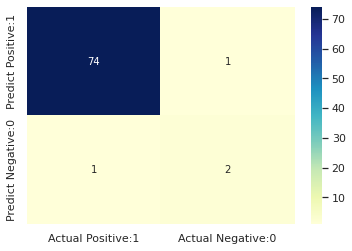

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report
#for i in range(0,25):
y_test1 = y_test.iloc[:,0] #since distribution of all y_test columns are the same(with three 1 and 75 0), I consider only the first column
print(classification_report(y_test1, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.00      0.00      0.00         3

    accuracy                           0.92        78
   macro avg       0.48      0.48      0.48        78
weighted avg       0.92      0.92      0.92        78



**Classification accuracy**

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9744


**True Positive Rate**

True Positive Rate is synonymous with Recall.

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9867


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9867


**False Positive Rate**

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3333


**ROC-AUC**

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

**True Positive Rate (TPR) is also called Recal**l. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) **of a single point.** This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

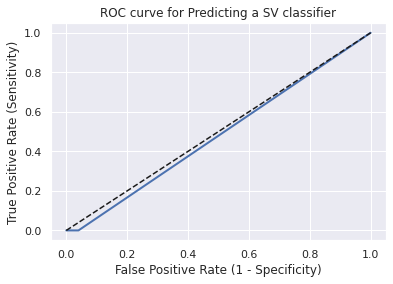

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test.iloc[:,0], y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a SV classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test.iloc[:,0], y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.4800


**Comments**

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

**Support Vectors:**

In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [ ]:
svc.support_vectors_

array([[0.        , 0.32258065, 0.1       , 0.08333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2       , 0.        ],
       [0.        , 0.64516129, 0.4       , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.51612903, 0.3       , 0.25      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.2       , 0.        ],
       [0.        , 0.12903226, 0.4       , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4       , 0.4       , 0.        ],
       [0.        , 0.32258065, 0.3       , 0.25      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.2       , 0.        ]])

**Number of Support Vectors:**

In [ ]:
print(svc.support_vectors_.shape)

(5, 14)


So, the number of support vectors that linear classifier was found is 5.

**RBF classifier:**

So, the number of support vectors that RBF classifier was found is 5.

The number of support vectors depends on how much slack we allow and the distribution of the data. If we allow a large amount of slack, we will have a large number of support vectors. If we allow very little slack, we will have very few support vectors. The accuracy depends on finding the right level of slack for the data being analyzed. Some data it will not be possible to get a high level of accuracy, we must simply find the best fit we can.

By packaging the preprocessor and the classifier into a single pipeline we have:

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc = SVC(kernel='rbf')
model = make_pipeline(svc)

**Hyperparameter Optimization using GridSearch CV**

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:



*   C controls hard or soft margin. 
*   Kernel function converts a problem to high-dimensional problem in order to seperate classes 

 

*   Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular Data Set. One of the examples where there are a lot of features, is Text Classification, as each alphabet is a new feature. So we mostly use Linear Kernel in Text Classification. Linear Kernel does not mean that we have only 2D dataset and hyperplane is a line. Hyperplane is linear and we may have large dimensional dataset or many features.


Advantages of using Linear Kernel:

1. Training a SVM with a Linear Kernel is Faster than with any other Kernel.

2. When training a SVM with a Linear Kernel, only the optimisation of the C Regularisation parameter is required. On the other hand, when training with other kernels, there is a need to optimise the gamma parameter which means that performing a grid search will usually take more time.

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import SVC classifier
from sklearn.svm import SVC

for i in range(0,25):
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
  svc=SVC() 

# declare parameters for hyperparameter tuning
  parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

  grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


  grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

ValueError: ignored

So, {'svc__C': 0.5, 'svc__gamma': 0.0001}

C value is the least that shows the least error and gamma value is the least that shows the simplest dicision function. C is a regularization metrci to show error. Lower C means lower error and larger C means larger error. Gamma represents the dicision function curvaty. Lower gamma, linear and higher gamma, more curve of decision boundary.

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:



*   C controls hard or soft margin. 
*   Kernel function converts a problem to high-dimensional problem in order to seperate classes 

 

*   Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular Data Set. One of the examples where there are a lot of features, is Text Classification, as each alphabet is a new feature. So we mostly use Linear Kernel in Text Classification. Linear Kernel does not mean that we have only 2D dataset and hyperplane is a line. Hyperplane is linear and we may have large dimensional dataset or many features.


Advantages of using Linear Kernel:

1. Training a SVM with a Linear Kernel is Faster than with any other Kernel.

2. When training a SVM with a Linear Kernel, only the optimisation of the C Regularisation parameter is required. On the other hand, when training with other kernels, there is a need to optimise the gamma parameter which means that performing a grid search will usually take more time.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

**Grid search to find best parameters for SVM model:**

SVM has some hyperparameters needed to tuned that are as follows: C, gamma for RBF kernel function

Grid search is a way to find the best parameters for any model out of the combinations we specify. I have formed a grid search on my model in the below manner and wish to find best parameters identified using this gridsearch.

**What is one vs all method?**

One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.

It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.So, we need to split multi-class dataset to multiple binary classification problems:

**Run SVM with default hyperparameters**

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters. lets train the model using SVM classifier

We need to separate features set X from the target column (class label) y, and divide the data set to 80% for training, and 20% for testing:

Out of the known metrics for validating machine learning models, we choose Accuracy and F1 as they are the most used in supervised machine learning.

For the **accuracy score**, it shows the percentage of the true positive and true negative to all data points. So, **it’s useful when the data set is balanced.**

For the **f1 score**, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, **it’s useful to calculate the f1 score when the data set isn’t balanced.**

Playing around with **SVM hyperparameters, like C, gamma, and degree in the previous code snippet** will display different results. As we can see, in this problem, SVM with Polynomial kernel function is outperforming SVM with RBF kernel function.

Note: Here, We have class imbalance in this dataset, so, f1 score is the better metric to show validation of machine learning in this problem.

Reference for all the above stuff:

(https://https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook)